### Importing the required libraries. 

In [16]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn :: utils
from sklearn.model_selection import train_test_split

# sklearn :: models
from sklearn.linear_model import LinearRegression

# sklearn :: evaluation metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

sns.set_style('whitegrid')

### Loading the Dataset 

In [2]:
df = pd.read_csv('/Users/tania/Downloads/true_car_listings.csv')

In [3]:
print(df.columns)

Index(['Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'Make', 'Model'], dtype='object')


In [4]:
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


### Cleaning some data

Cleaning up the data a little to be able to break down the information a little more. We can extrct the information related to the transmission from the Model column. 

In [5]:
df['Transmission'] = df.Model.str.extract('(Speed|Automatic)')

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [6]:
df.sample(20)

,Price,Year,Mileage,City,State,Vin,Make,Model,Transmission
702841,69588,2017,1548,Charlotte,NC,WP1AG2A56HLB55425,Porsche,MacanGTS,NaN
624861,4990,2005,127247,Tucson,AZ,WMWRC335X5TK60190,MINI,Cooper,NaN
694718,25988,2017,7401,New Braunfels,TX,5N1AT2MT4HC747716,Nissan,Rogue2017.5,NaN
346100,33995,2011,173852,Cedar Hill,TX,1FT7W2BT6BEC51451,Ford,Super,NaN
387538,13000,2013,48603,Cincinnati,OH,1HGCR2F31DA122464,Honda,Accord,NaN
529178,16644,2016,34574,Wytheville,VA,5XXGT4L33GG044960,Kia,OptimaLX,NaN
437166,15750,2015,38196,Greenfield,WI,5NPE34AFXFH029346,Hyundai,Sonata2.4L,NaN
55411,14999,2008,91093,Trevose,PA,5UXFE43528L020592,BMW,X5AWD,NaN
753059,17496,2017,7119,Jamaica,NY,4T1BF1FK0HU416412,Toyota,CamrySE,NaN
590866,14994,2014,13928,San Marcos,TX,JM1NC2JF9E0234835,Mazda,MX5,NaN


In [7]:
df['Model'] = df['Model'].str.replace('-Speed', '')
df['Model'] = df['Model'].str.replace('-Automatic', '')
df['Model'] = df['Model'].str.replace('Speed', '')
df['Model'] = df['Model'].str.replace('Automatic', '')
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model,Transmission
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6,Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5,Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6,Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5,Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILX,Automatic


In [8]:
df.Transmission = df.Transmission.fillna('')
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model,Transmission
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6,Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5,Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6,Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5,Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILX,Automatic


In [9]:
# apply dummies on the training set
col = 'Transmission'
df_dummies = pd.get_dummies(df[col])
df_dummies.columns = [str(col)+'_'+str(c) for c in df_dummies.columns]
df = pd.concat([df, df_dummies], axis=1)

In [10]:
df.sample(100)

,Price,Year,Mileage,City,State,Vin,Make,Model,Transmission,Transmission_,Transmission_Automatic,Transmission_Speed
762681,7869,2009,84917,Florence,KY,1NXBU40E49Z130185,Toyota,Corolla4dr,,1,0,0
406645,13500,2011,74457,Lawrenceville,NJ,JHLRE4H73BC030146,Honda,CR-V4WD,,1,0,0
592640,17999,2014,19107,Greensboro,NC,JM1NC2JF0E0236716,Mazda,MX5,,1,0,0
467980,14883,2011,75568,Plano,TX,JN1CV6EK3BM210537,INFINITI,G37,,1,0,0
220575,11999,2006,105489,Omaha,NE,1D7HU18276S675561,Dodge,Ram,,1,0,0
524675,16846,2016,16749,San Diego,CA,KNAGT4L34G5093781,Kia,OptimaLX,,1,0,0
630520,6588,2006,117064,Sacramento,CA,JA4LZ81FX6U023074,Mitsubishi,Outlander4dr,,1,0,0
271725,11963,2013,114293,Denton,TX,1FMCU0J92DUB12789,Ford,EscapeTitanium,,1,0,0
438224,10777,2014,54548,Medford,NY,5NPDH4AE6EH469387,Hyundai,ElantraSE,,1,0,0
379395,9900,2014,55038,St Louis,MO,19XFB2F58EE022748,Honda,Civic,,1,0,0


In [11]:
print(df.columns)

Index(['Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'Make', 'Model',
       'Transmission', 'Transmission_', 'Transmission_Automatic',
       'Transmission_Speed'],
      dtype='object')


Selecting the columns and handling the missing values

In [12]:
X_columns = ['Year', 'Mileage', 'Transmission_Automatic', 'Transmission_Speed']
y_column = ['Price']

### Model Training

We split the data using SKlearn

In [13]:
# split the data

df = df.sample(frac=1).reset_index(drop=True)

threshold = 0.8
absolute_threshold = int(len(df)*threshold)

X_train = df.iloc[:absolute_threshold][X_columns]
y_train = df.iloc[:absolute_threshold][y_column]

X_test = df.iloc[absolute_threshold:][X_columns]
y_test = df.iloc[absolute_threshold:][y_column]

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (681697, 4)
y_train (681697, 1)
X_test (170425, 4)
y_test (170425, 1)


In [14]:
# train a linear regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Model Evaluation

RMSE 12675.59


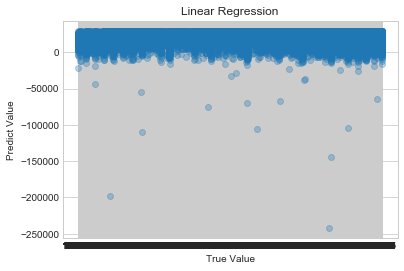

In [19]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE', round(rmse, 2))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot(range(0,10), range(0,10), '--r', alpha=0.3, label='Line1')
plt.title('Linear Regression')
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.show()

### Prepare Submission

In [22]:
df_prediction = df[X_columns].fillna(0.0)
df['Price'] = model.predict(df_prediction)
df[['Vin','Make', 'Year', 'Price']]

,Vin,Make,Year,Price
0,JTNBB46K293050456,Toyota,2009,13379.082434
1,1FDWE3FL4GDC36423,Ford,2016,25330.668011
2,1VWBP7A36DC046701,Volkswagen,2013,21960.471301
3,1G6DT57V990139115,Cadillac,2009,15135.622168
4,2T1BURHE4HC845162,Toyota,2017,28696.156443
5,1GTR1TEC2FZ298869,GMC,2015,25332.329446
6,1GYS4CKJ5GR181780,Cadillac,2016,26691.947518
7,1FTEW1EF7HFA75911,Ford,2017,27830.161455
8,WBA7E2C58HG740382,BMW,2017,27542.226563
9,1G1ZB5E08CF279540,Chevrolet,2012,20027.630073


In [ ]:
df_test[['id', 'log_price']].to_csv('/Users/tania/Downloads/cebd1260/submission_linear_regression.csv', index=False)